In [1]:
import sys
print(sys.version)

3.6.5 (v3.6.5:f59c0932b4, Mar 28 2018, 05:52:31) 
[GCC 4.2.1 Compatible Apple LLVM 6.0 (clang-600.0.57)]


In [2]:
import os
import json
import pandas as pd
import pandas_profiling
import numpy as np
from scipy import stats
import statsmodels.api as sm
from patsy import dmatrices
from matplotlib import pyplot as plt

In [3]:
%matplotlib inline

# Statistical analysis of feature computations results


## 1. Data importation and manipulation

In [4]:
def get_path_to_all_files(folder_name):
    """Recursively get all filepaths from a directory tree."""

    filepaths = []
    for dirname, dirnames, filenames in os.walk(folder_name):
        for filename in filenames:
            if '.DS_Store' not in filename:
                filepaths.append(os.path.join(dirname, filename))

    return filepaths

### 1.1 Data importation


In [5]:
results_folder = "/Users/Antonin/Documents/VUB/semester 4/thesis/validation study/data/results/feature_results"

In [6]:
files = get_path_to_all_files(results_folder)

#### 1.1.1 Force plate feature data

In [7]:
fp_files = [file for file in files if "Vicon" in file and "cop" not in file]
fp_files[1:5]

['/Users/Antonin/Documents/VUB/semester 4/thesis/validation study/data/results/feature_results/Sujet4/Session2/Vicon/7_features.json',
 '/Users/Antonin/Documents/VUB/semester 4/thesis/validation study/data/results/feature_results/Sujet4/Session2/Vicon/3_features.json',
 '/Users/Antonin/Documents/VUB/semester 4/thesis/validation study/data/results/feature_results/Sujet4/Session2/Vicon/11_features.json',
 '/Users/Antonin/Documents/VUB/semester 4/thesis/validation study/data/results/feature_results/Sujet4/Session2/Vicon/12_features.json']

#### 1.1.2 Wii Balance Board feature data


In [8]:
wbb_files = [file for file in files if "Vicon" not in file and "cop" not in file]
wbb_files[1:5]

['/Users/Antonin/Documents/VUB/semester 4/thesis/validation study/data/results/feature_results/Sujet4/Session2/BalanceBoard/7_features.json',
 '/Users/Antonin/Documents/VUB/semester 4/thesis/validation study/data/results/feature_results/Sujet4/Session2/BalanceBoard/3_features.json',
 '/Users/Antonin/Documents/VUB/semester 4/thesis/validation study/data/results/feature_results/Sujet4/Session2/BalanceBoard/11_features.json',
 '/Users/Antonin/Documents/VUB/semester 4/thesis/validation study/data/results/feature_results/Sujet4/Session2/BalanceBoard/12_features.json']

### 1.2 Data manipulation

In [9]:
def create_and_merge_dataframes(files):
    time_frames = []
    frequency_frames = []
    for filepath in files:
        with open(filepath) as json_data:
            features = json.load(json_data)
            time_features = features["time_features"]
            frequency_features = features["frequency_features"]
        time_frames.append(pd.DataFrame(time_features, index=[0]))
        frequency_frames.append(pd.DataFrame(frequency_features,index=[0]))
    
    time_features_df = pd.concat(time_frames, axis=0)
    frequency_features_df = pd.concat(frequency_frames, axis=0)
    
    df1 = time_features_df.reset_index().drop('index', 1)
    df2 = frequency_features_df.reset_index().drop('index', 1)
    
    return (df1,df2)

#### 1.2.1 WBB  features results merging

In [10]:
wbb_time,wbb_freq = create_and_merge_dataframes(wbb_files)

In [11]:
wbb_time.head()

,Mean distance,Mean distance-ML,Mean distance-AP,Rms distance,Rms distance-ML,Rms distance-AP,Path length,Path length-ML,Path length-AP,Mean velocity,...,Range-ML,Range-AP,95% confidence circle area,95% confidence elipse area,Sway area,Mean frequency,Mean frequency-ML,Mean frequency-AP,Fractal dimension-CC,Fractal dimension-CE
0,5.853794,4.139257,6.215491,7.236378,5.116892,7.812600,1156.977038,834.744011,649.542621,14.236739,...,38.376332,37.730900,107.652641,NaN,41.086883,0.387073,0.438674,0.227323,1.684329,NaN
1,3.104017,2.194871,2.579860,3.802854,2.689024,3.178997,599.786864,390.514870,359.453877,7.389541,...,11.398411,31.964583,30.268991,NaN,8.674694,0.378890,0.387502,0.303454,1.678801,NaN
2,2.478340,1.752451,3.231798,2.964012,2.095873,4.473267,551.248566,383.585738,309.743555,6.794298,...,8.844581,25.678797,19.296188,NaN,9.115337,0.436319,0.476913,0.208824,1.714678,NaN
3,0.702834,0.496979,0.349887,0.902053,0.637848,0.436807,596.387538,451.878020,297.929853,7.381034,...,4.889105,8.482124,1.551872,NaN,1.411116,1.671415,1.989284,1.862945,2.152594,NaN
4,1.241501,0.877874,0.314234,1.422258,1.005688,0.397117,591.560884,472.556506,263.905482,7.288195,...,4.658210,4.318738,4.842216,NaN,1.809374,0.934314,1.172377,1.829114,1.938660,NaN


In [12]:
wbb_freq.head()

,Total power-RD,Total power-ML,Total power-AP,Peak frequency-RD,Peak frequency-ML,Peak frequency-AP,50% power frequency-RD,50% power frequency-ML,50% power frequency-AP,80% power frequency-RD,80% power frequency-ML,80% power frequency-AP
0,0.238545,0.125530,0.088516,0.05,0.05,0.05,0.0,0.0,0.0,0.0,0.0,0.0
1,0.043231,0.022063,0.014657,0.05,0.05,0.05,0.0,0.0,0.0,0.0,0.0,0.0
2,0.040298,0.020813,0.012053,0.05,0.05,0.05,0.0,0.0,0.0,0.0,0.0,0.0
3,0.048451,0.031087,0.013026,0.05,0.05,0.05,0.0,0.0,0.0,0.0,0.0,0.0
4,0.059510,0.031745,0.010156,0.05,0.05,0.05,0.0,0.0,0.0,0.0,0.0,0.0


#### 1.2.2 FP  features results merging

In [13]:
fp_time,fp_freq = create_and_merge_dataframes(fp_files)

In [14]:
fp_time.head()

,Mean distance,Mean distance-ML,Mean distance-AP,Rms distance,Rms distance-ML,Rms distance-AP,Path length,Path length-ML,Path length-AP,Mean velocity,...,Range-ML,Range-AP,95% confidence circle area,95% confidence elipse area,Sway area,Mean frequency,Mean frequency-ML,Mean frequency-AP,Fractal dimension-CC,Fractal dimension-CE
0,8.615020,6.091739,4.361874,10.870381,7.686520,5.484854,1045.610464,639.099157,705.946268,38.870277,...,38.525438,32.600497,233.164531,NaN,109.116541,0.718094,0.689445,1.063583,1.673709,NaN
1,3.798910,2.686235,2.768912,4.644603,3.284230,3.297197,199.092965,162.988670,86.984544,7.252931,...,14.822461,14.165427,45.338585,NaN,10.806937,0.303861,0.390747,0.202309,1.469631,NaN
2,6.473231,4.577266,1.986784,8.296883,5.866782,2.376812,169.825584,140.786199,68.860825,6.137535,...,27.698238,10.659815,131.641295,NaN,8.035550,0.150901,0.196503,0.221431,1.336281,NaN
3,0.589418,0.416781,0.596368,0.717435,0.507303,0.788092,85.554779,39.582178,66.405673,3.091969,...,2.619592,9.064748,1.091432,NaN,0.888780,0.834895,0.606746,0.711389,1.720896,NaN
4,0.436363,0.308555,1.019478,0.539198,0.381270,1.147648,90.988292,42.467225,71.406114,3.253067,...,1.850596,4.463669,0.598200,NaN,1.063007,1.186492,0.869868,0.442680,1.830981,NaN


In [15]:
fp_freq.head()

,Total power-RD,Total power-ML,Total power-AP,Peak frequency-RD,Peak frequency-ML,Peak frequency-AP,50% power frequency-RD,50% power frequency-ML,50% power frequency-AP,80% power frequency-RD,80% power frequency-ML,80% power frequency-AP
0,1.402389,0.768656,1.131305,0.05,0.05,0.05,0.0,0.0,0.0,0.0,0.0,0.0
1,0.104832,0.053719,0.014431,0.05,0.05,0.05,0.0,0.0,0.0,0.0,0.0,0.0
2,0.073013,0.037140,0.008329,0.05,0.05,0.05,0.0,0.0,0.0,0.0,0.0,0.0
3,0.005709,0.002946,0.013600,0.05,0.05,0.05,0.0,0.0,0.0,0.0,0.0,0.0
4,0.006450,0.003687,0.010739,0.05,0.05,0.05,0.0,0.0,0.0,0.0,0.0,0.0


## 2. Statistical analysis

### 2.1 General descriptive statistics HTML reports 

In [16]:
outputfile = "/Users/Antonin/Documents/VUB/semester 4/thesis/validation study/notebooks/results/wbb_data_time_domain_report.html"
df_profile = pandas_profiling.ProfileReport(wbb_time, bins=50)
df_profile.to_file(outputfile=outputfile)

### 2.2 Features mean value and standard deviation 

In [17]:
wbb_time_mean_df = pd.DataFrame(wbb_time.mean(), columns = ["WBB mean"])
wbb_time_std_df = pd.DataFrame(wbb_time.std(), columns = ["WBB std"])

In [18]:
wbb_freq_mean_df = pd.DataFrame(wbb_freq.mean(), columns = ["WBB mean"])
wbb_freq_std_df = pd.DataFrame(wbb_freq.std(), columns = ["WBB std"])

In [19]:
fp_time_mean_df = pd.DataFrame(fp_time.mean(), columns = ["FP mean"])
fp_time_std_df = pd.DataFrame(fp_time.std(), columns = ["FP std"])

In [20]:
fp_freq_mean_df = pd.DataFrame(fp_freq.mean(), columns = ["FP mean"])
fp_freq_std_df = pd.DataFrame(fp_freq.std(), columns = ["FP std"])

In [21]:
time_domain_results = pd.concat([wbb_time_mean_df, wbb_time_std_df, fp_time_mean_df, fp_time_std_df], axis = 1)

In [22]:
time_domain_results

,WBB mean,WBB std,FP mean,FP std
Mean distance,13.552456,32.432208,6.480793,4.714154
Mean distance-ML,9.583034,22.933034,4.582613,3.333410
Mean distance-AP,4.680756,6.040587,9.069151,21.435949
Rms distance,16.054781,36.388456,8.252971,5.988650
Rms distance-ML,11.352445,25.730524,5.835732,4.234615
Rms distance-AP,5.901490,7.349371,10.583830,23.380725
Path length,954.478377,1665.885733,657.231875,669.274025
Path length-ML,723.283413,1326.190177,372.935958,295.920975
Path length-AP,474.195543,890.987671,445.909521,573.572235
Mean velocity,12.067203,20.541134,23.245698,23.663873


### 2.3 Pearson's correlation coefficient and regression lines equations 


In [23]:
coeffs = fp_time.corrwith(wbb_time)


In [24]:
fp_time_cut = fp_time[:wbb_time.shape[0]]
len(fp_time_cut.columns)

23

In [25]:
def plot_correlation(df1,df2,name="time_domain"):
    columns = df1.columns
    fig, axs = plt.subplots(8,3,figsize=(20,30),facecolor='w', edgecolor='k')
    fig.subplots_adjust(hspace = .5)
    axs[-1, -1].axis('off')
    for ax, column in zip(axs.ravel(), columns):
        x = df1[column]
        y = df2[column]
        slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
        ax.plot(x, y, '.', label='original data')
        ax.plot(x, intercept + slope*x, 'black', label='fitted line', linewidth=0.3)
        ax.set_xlabel('Balance Board')
        ax.set_ylabel('Force plate')
        ax.set_title(column, weight = 600)
        r_squared = round(r_value**2,4)
        ax.text(0.9, 0.5, "R\u00b2={}".format(r_squared),fontsize=9, horizontalalignment='center',
             verticalalignment='center',transform=ax.transAxes)
        #ax.legend()
    plt.savefig("results/{}_correlation_plots.png".format(name), bbox_inches='tight')


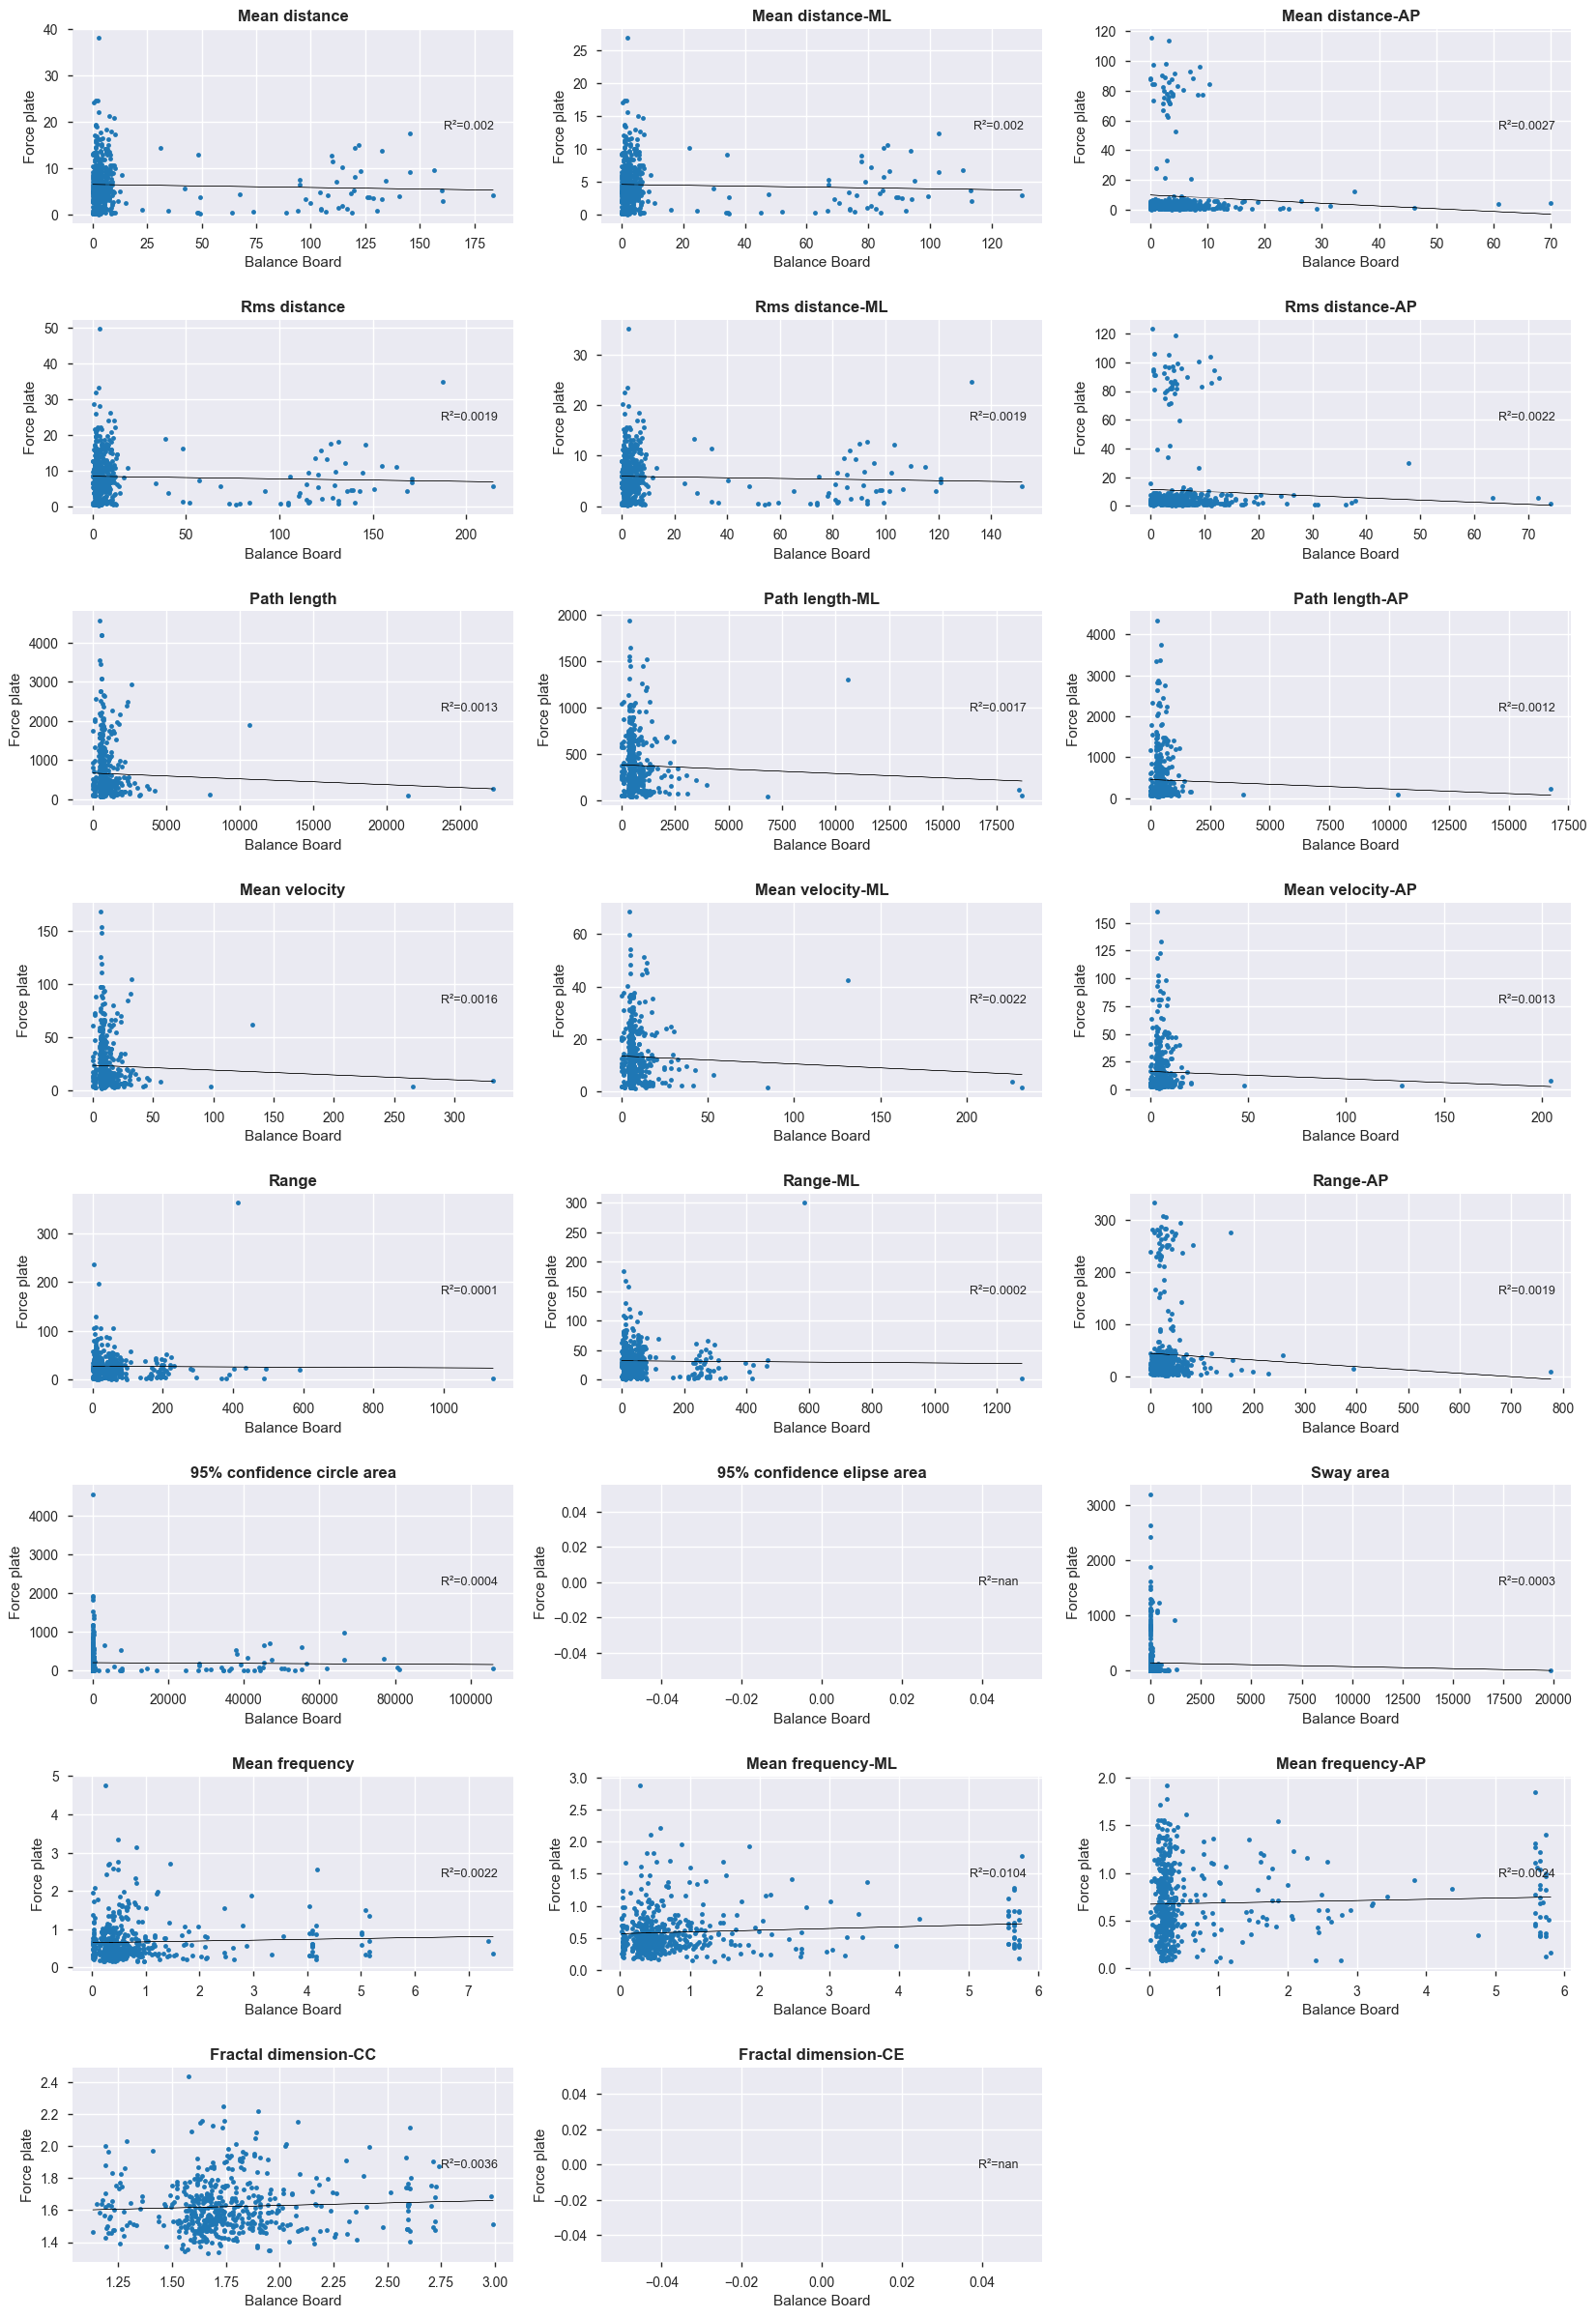

In [26]:
plot_correlation(wbb_time, fp_time_cut)

### 2.4 Two-tailed paired-sample statistical test



### 2.5 Intraclass correlation coefficient (ICC) 



### 2.6 Bland and Altman plots + LOA (limit of agreement)